In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### data fetch

In [2]:
import yfinance as yf

# List of risky assets (stocks)
tickers_risky_assets = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "NFLX", "JPM", "GS", "BND", "JD"]

# Ticker symbol for the iShares 7-10 Year Treasury Bond ETF
ticker_risk_free_asset = "IEF"

# Fetch historical price data for the risky assets
data_risky_assets = yf.download(tickers_risky_assets, period="3mo", interval="1d")["Adj Close"]

# Fetch historical price data for the risk-free asset (U.S. Treasury bonds)
data_risk_free_asset = yf.download(ticker_risk_free_asset, period="3mo", interval="1d")["Adj Close"]

# Print the first few rows of the data for the risky assets
print("\nHistorical Prices for Risky Assets:")
print(data_risky_assets.head())

# Print the first few rows of the data for the risk-free asset
print("\nHistorical Prices for Risk-Free Asset (U.S. Treasury Bonds):")
print(data_risk_free_asset.head())


[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


Historical Prices for Risky Assets:
Ticker            AAPL        AMZN        BND       GOOGL          GS  \
Date                                                                    
2023-11-24  189.727905  146.740005  69.957222  136.690002  336.387756   
2023-11-27  189.548126  147.729996  70.383553  136.410004  334.959503   
2023-11-28  190.157349  147.029999  70.680984  137.199997  334.899994   
2023-11-29  189.128662  146.320007  71.047836  134.990005  340.260010   
2023-11-30  189.707916  146.089996  70.819801  132.529999  341.540009   

Ticker             JD         JPM        MSFT        NFLX        TSLA  
Date                                                                   
2023-11-24  28.760000  152.599014  376.733307  479.559998  235.449997  
2023-11-27  28.340000  152.251175  377.911133  479.170013  236.080002  
2023-11-28  28.160000  152.599014  381.993622  479.000000  246.720001  
2023-11-29  27.440001  153.374252  378.150696  477.190002  244.139999  
2023-11-30  27.4300

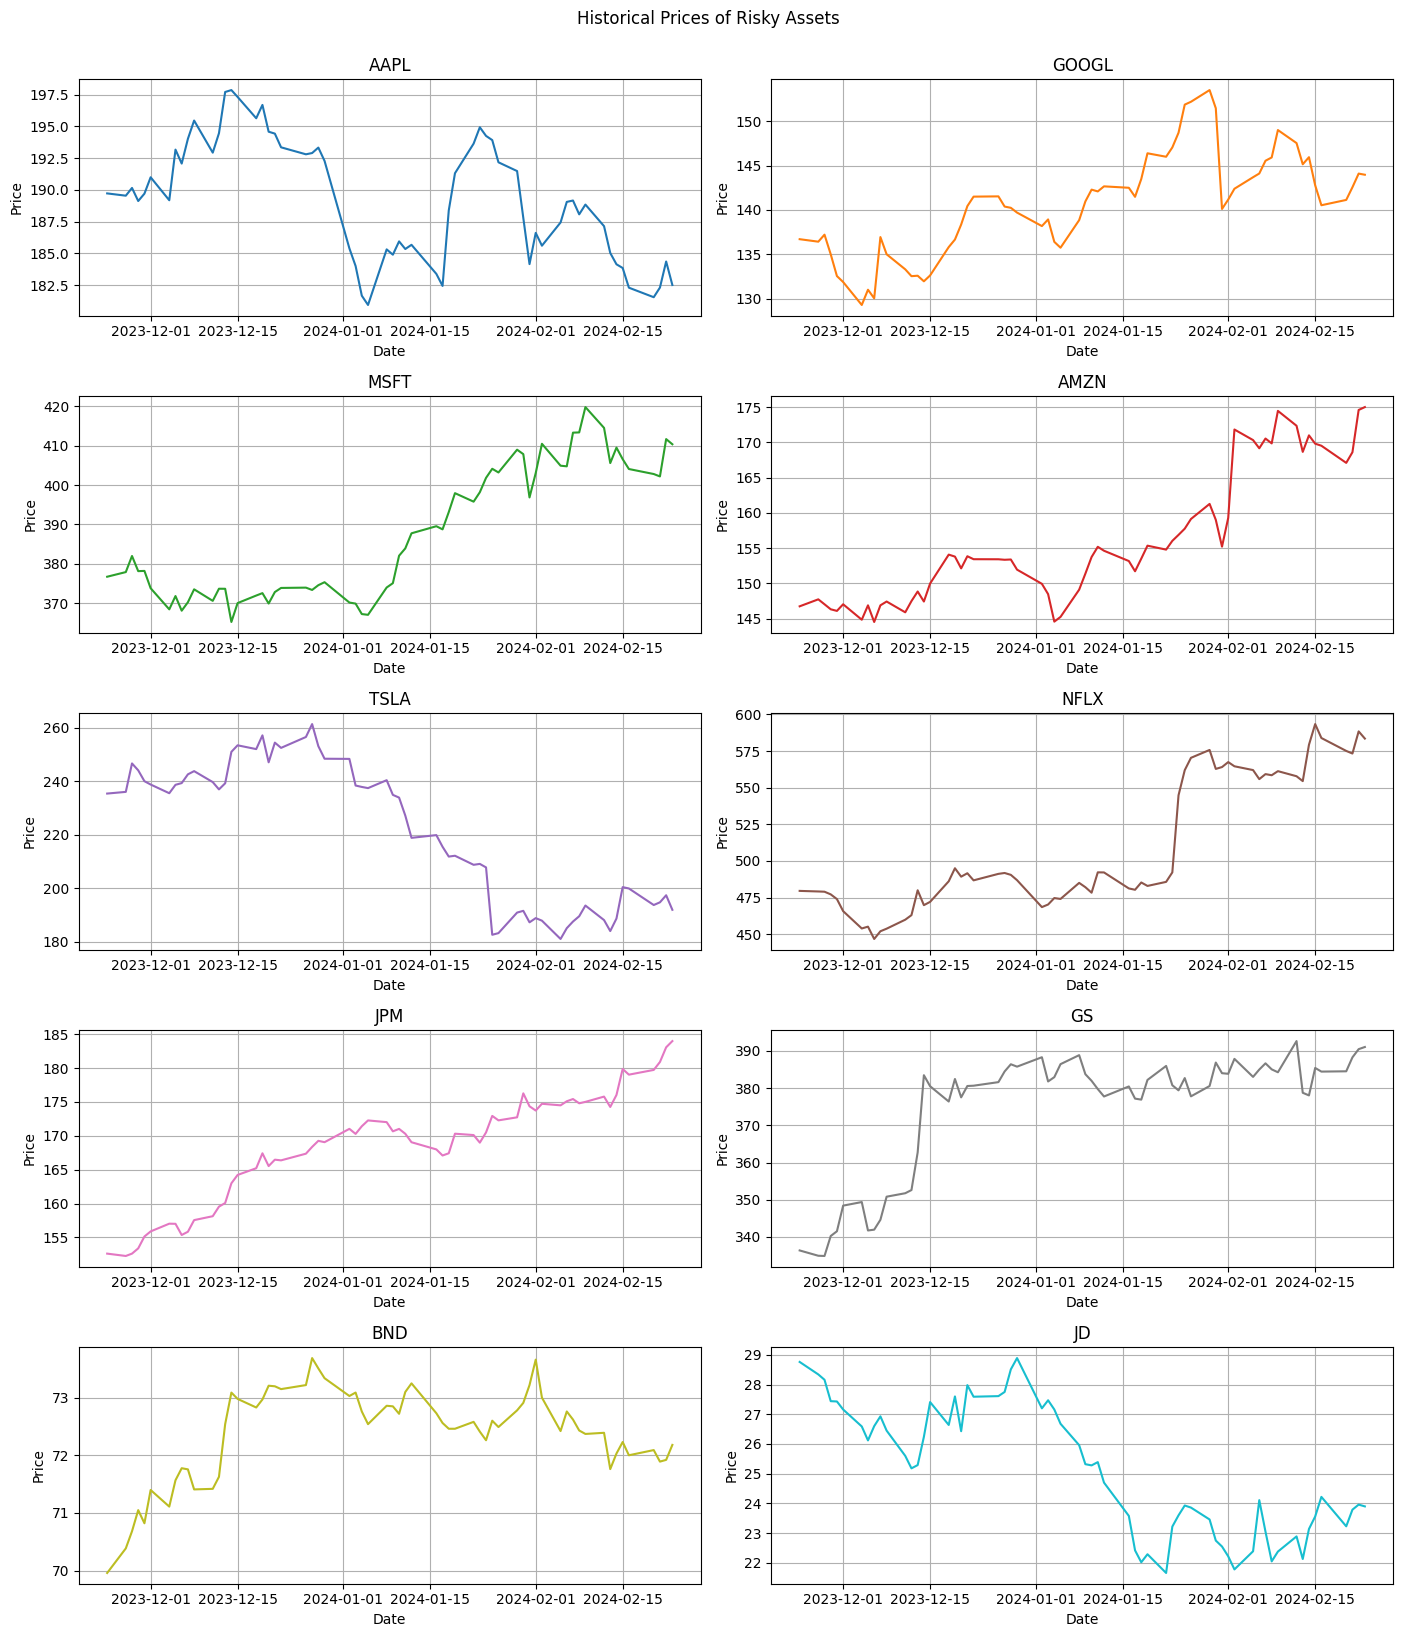

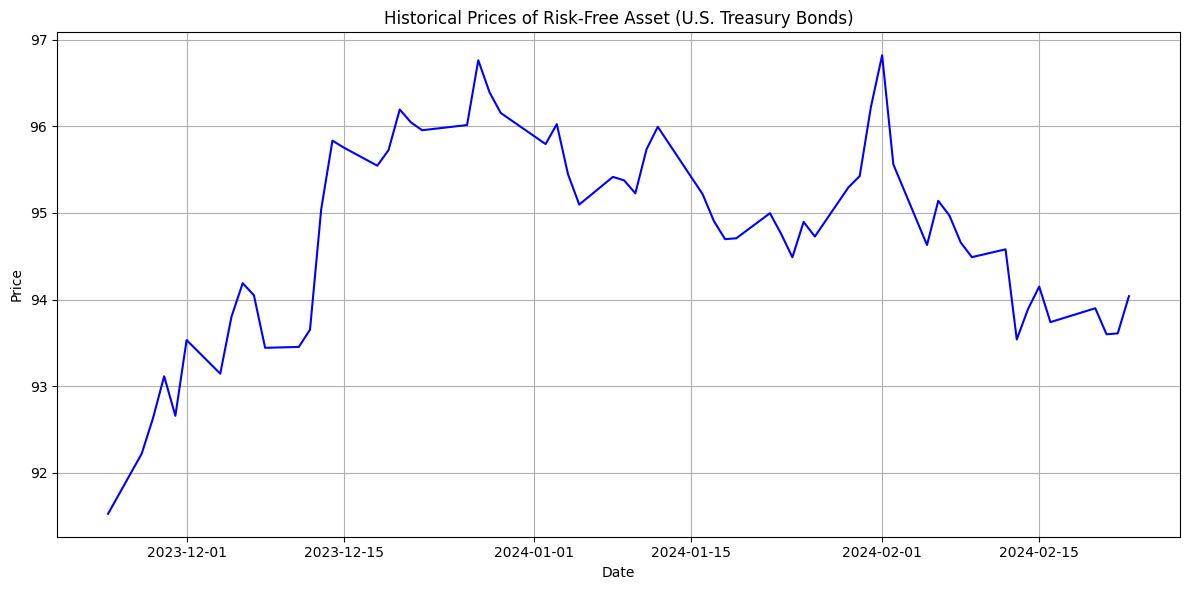

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot historical prices of risky assets as subplots in one graph
plt.figure(figsize=(14, 16))
for i, ticker in enumerate(tickers_risky_assets, 1):
    plt.subplot(5, 2, i)
    sns.lineplot(data=data_risky_assets[ticker], color=f'C{i-1}')
    plt.title(ticker)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
plt.tight_layout()
plt.suptitle('Historical Prices of Risky Assets', y=1.02)
plt.show()

# Plot historical prices of the risk-free asset (U.S. Treasury bonds) in another graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_risk_free_asset, color='blue')
plt.title('Historical Prices of Risk-Free Asset (U.S. Treasury Bonds)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


### current yeild

In [4]:
# Latest closing price of the iShares 7-10 Year Treasury Bond ETF (TLT)
current_price_tlt = data_risk_free_asset.iloc[-1]

# Assume a coupon rate for 7-10 year Treasury bonds (e.g., 2%)
coupon_rate = 0.02  # 2%

# Face value of a typical U.S. Treasury bond
face_value = 100

# Calculate the annual coupon payment
annual_coupon_payment = coupon_rate * face_value

# Calculate the current yield
current_yield = (annual_coupon_payment / current_price_tlt) * 100

print("Estimated Current Yield of U.S. Treasury Bonds:", current_yield)


Estimated Current Yield of U.S. Treasury Bonds: 2.126754551817291


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Calculate simple returns for each risky asset
simple_returns_risky_assets = data_risky_assets.pct_change().dropna()
print(simple_returns_risky_assets.head())
# Calculate simple returns for the risk-free asset (U.S. Treasury bonds)
simple_returns_risk_free_asset = data_risk_free_asset.pct_change().dropna()
print(simple_returns_risk_free_asset.head())

Ticker          AAPL      AMZN       BND     GOOGL        GS        JD  \
Date                                                                     
2023-11-27 -0.000948  0.006747  0.006094 -0.002048 -0.004246 -0.014604   
2023-11-28  0.003214 -0.004738  0.004226  0.005791 -0.000178 -0.006351   
2023-11-29 -0.005410 -0.004829  0.005190 -0.016108  0.016005 -0.025568   
2023-11-30  0.003063 -0.001572 -0.003210 -0.018224  0.003762 -0.000364   
2023-12-01  0.006791  0.006434  0.008157 -0.005055  0.020173 -0.009843   

Ticker           JPM      MSFT      NFLX      TSLA  
Date                                                
2023-11-27 -0.002279  0.003126 -0.000813  0.002676  
2023-11-28  0.002285  0.010803 -0.000355  0.045069  
2023-11-29  0.005080 -0.010060 -0.003779 -0.010457  
2023-11-30  0.011405  0.000158 -0.006748 -0.016630  
2023-12-01  0.004869 -0.011612 -0.017364 -0.005207  
Date
2023-11-27    0.007586
2023-11-28    0.004410
2023-11-29    0.005247
2023-11-30   -0.004900
2023-12-01   

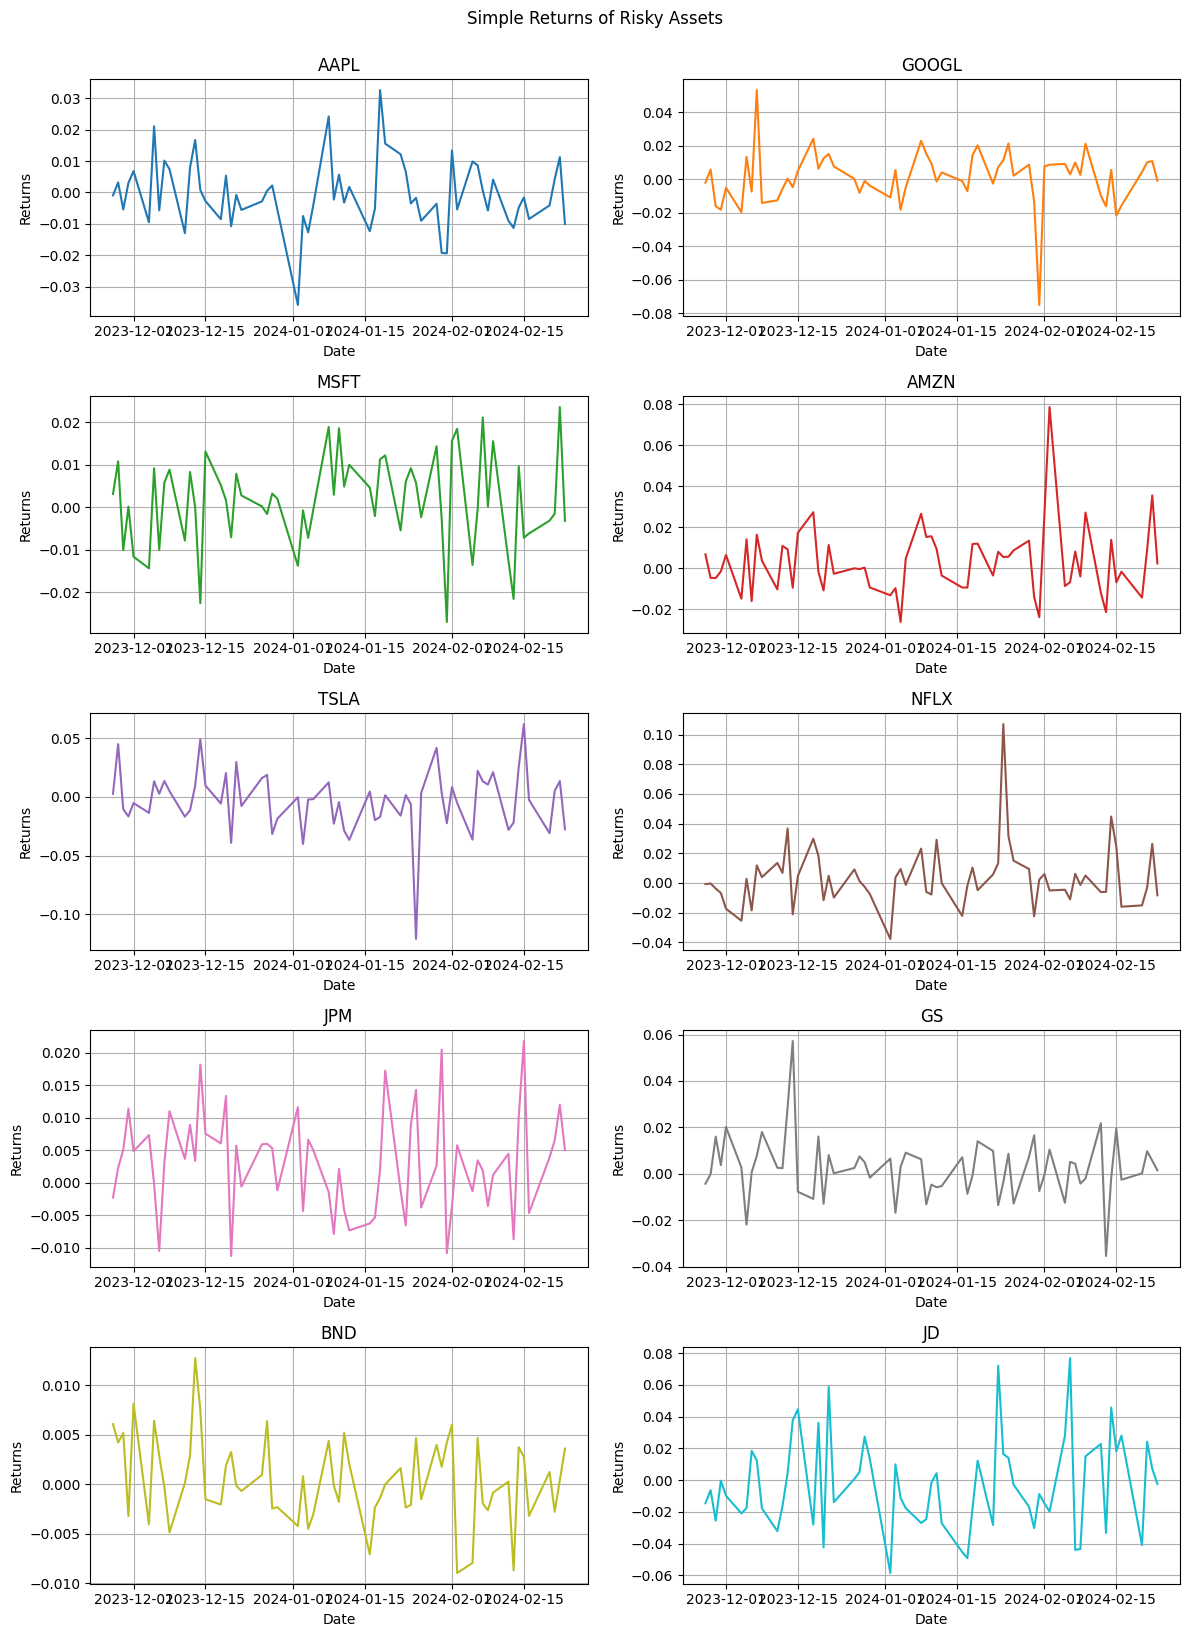

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot all 10 risky assets as subplots in one graph
plt.figure(figsize=(12, 16))
for i, ticker in enumerate(tickers_risky_assets, 1):
    plt.subplot(5, 2, i)
    sns.lineplot(data=simple_returns_risky_assets[ticker], color=f'C{i-1}')
    plt.title(ticker)
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.grid(True)
plt.tight_layout()
plt.suptitle('Simple Returns of Risky Assets', y=1.02)
plt.show()



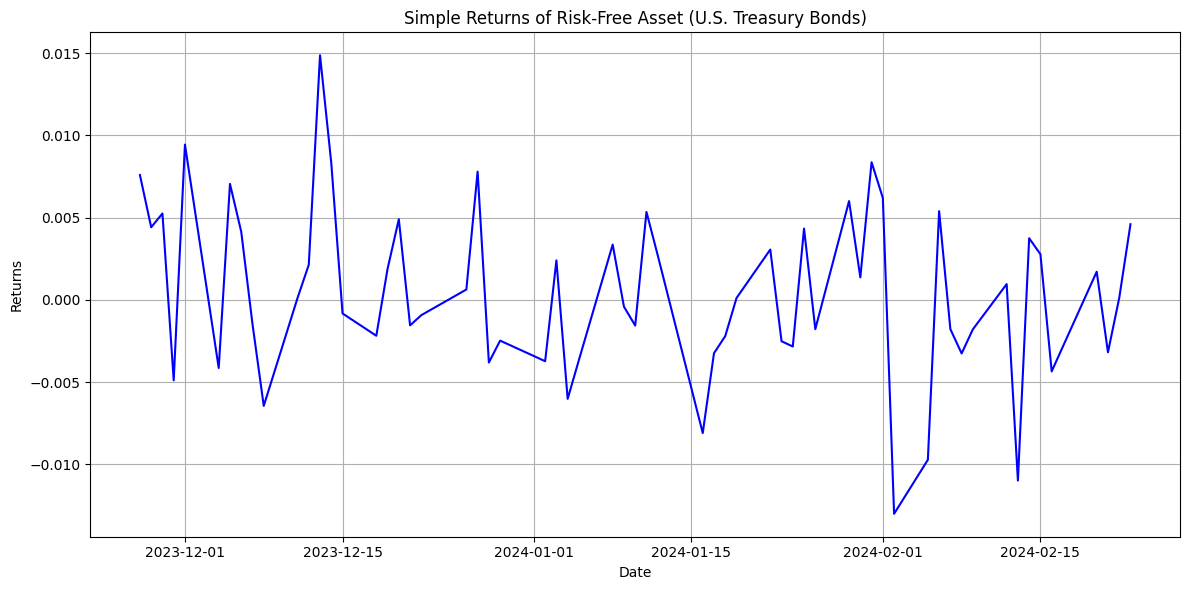

In [7]:
# Plot the risk-free asset (U.S. Treasury bonds) in another graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=simple_returns_risk_free_asset, color='blue')
plt.title('Simple Returns of Risk-Free Asset (U.S. Treasury Bonds)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

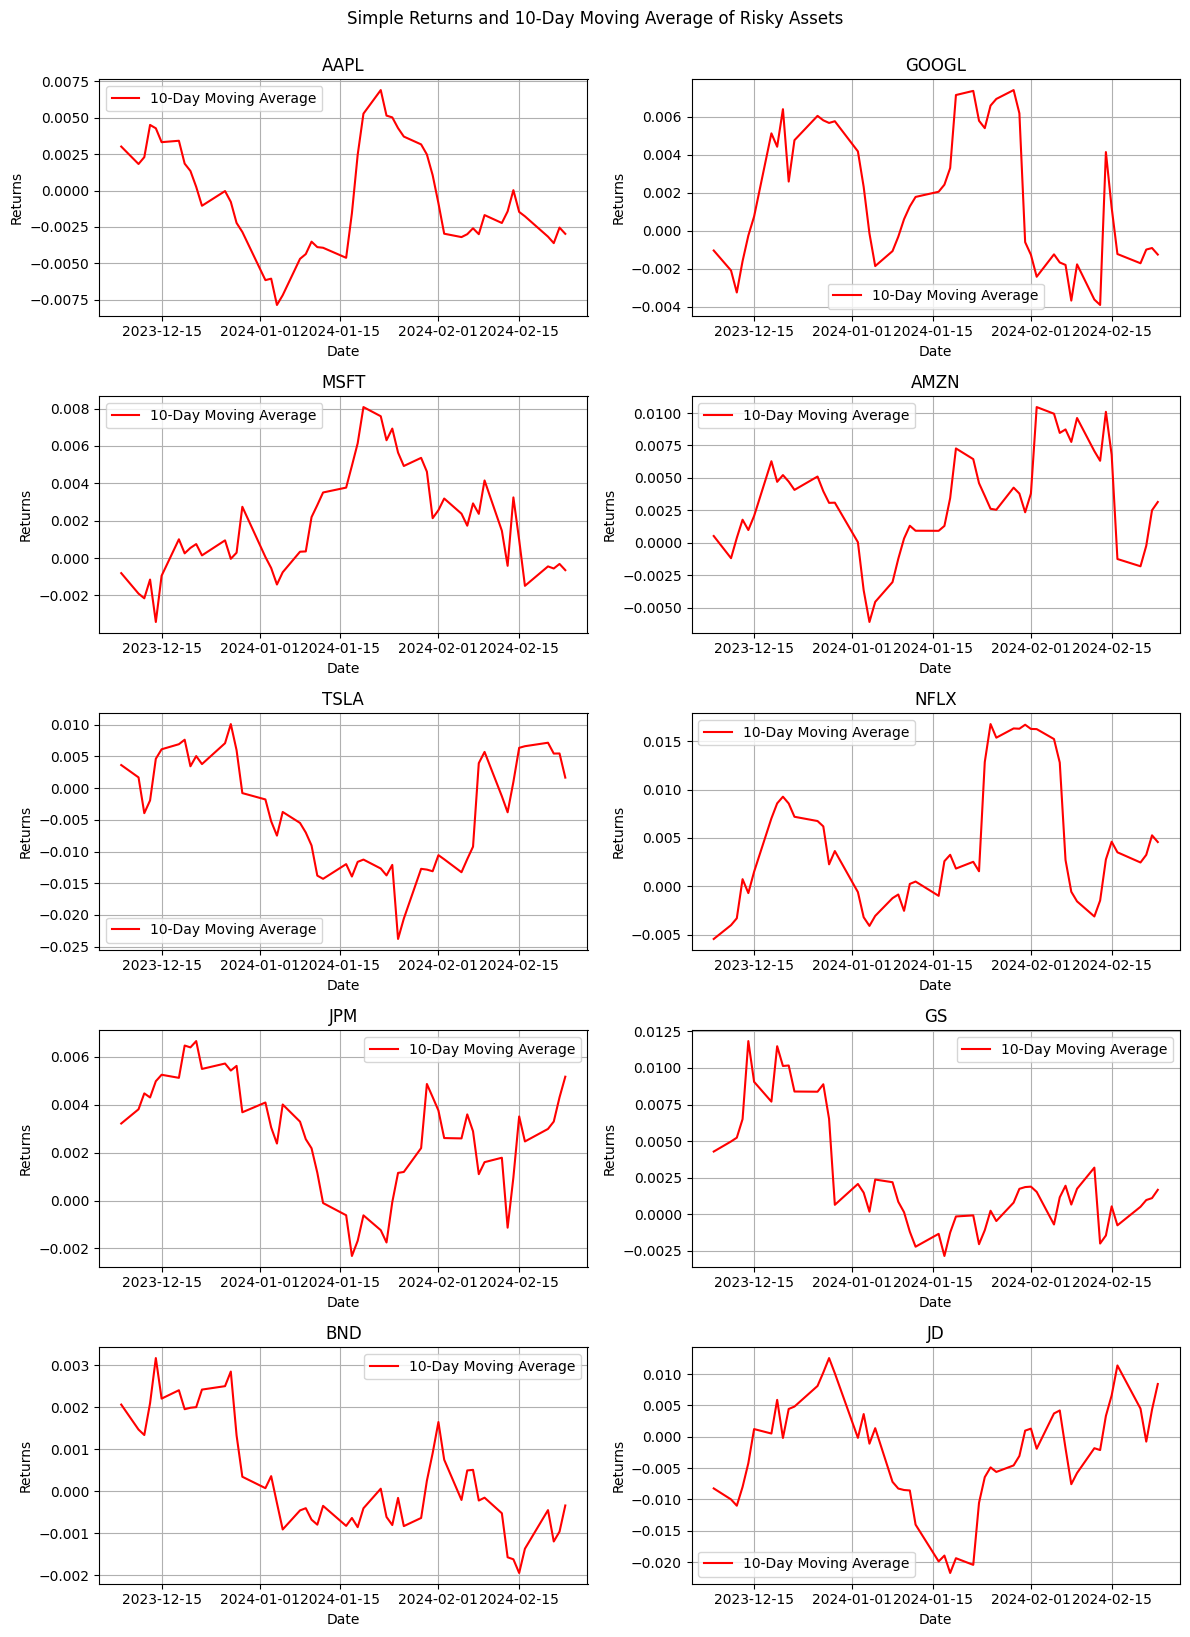

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate 10-day moving average for each risky asset
moving_average_risky_assets = simple_returns_risky_assets.rolling(window=10).mean()

# Plot all 10 risky assets as subplots in one graph with 10-day moving average
plt.figure(figsize=(12, 16))
for i, ticker in enumerate(tickers_risky_assets, 1):
    plt.subplot(5, 2, i)
    sns.lineplot(data=moving_average_risky_assets[ticker], color='red', label='10-Day Moving Average')
    plt.title(ticker)
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.suptitle('Simple Returns and 10-Day Moving Average of Risky Assets', y=1.02)
plt.show()


In [9]:
# Let's use VOO as a proxy for market returns
ticker_market_index = "VOO"
data_market_index = yf.download(ticker_market_index, period="3mo", interval="1d")["Adj Close"]
print("\n","data market index", data_market_index.head())
simple_returns_market_index = data_market_index.pct_change().dropna()
print("\n","simple returns market index",simple_returns_market_index.head())

[*********************100%%**********************]  1 of 1 completed


 data market index Date
2023-11-24    416.650452
2023-11-27    415.923462
2023-11-28    416.331757
2023-11-29    416.062897
2023-11-30    417.676208
Name: Adj Close, dtype: float64

 simple returns market index Date
2023-11-27   -0.001745
2023-11-28    0.000982
2023-11-29   -0.000646
2023-11-30    0.003878
2023-12-01    0.005866
Name: Adj Close, dtype: float64


In [10]:
import plotly.graph_objects as go

# Plot market index data as a line chart
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data_market_index.index, y=data_market_index.values, mode='lines', name='Market Index'))
fig1.update_layout(title='Market Index Data', xaxis_title='Date', yaxis_title='Price', template='plotly_white')
fig1.show()

# Plot simple returns of market index as a line chart
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=simple_returns_market_index.index, y=simple_returns_market_index.values, mode='lines', name='Simple Returns', line=dict(color='green')))
fig2.update_layout(title='Simple Returns of Market Index', xaxis_title='Date', yaxis_title='Returns', template='plotly_white')
fig2.show()


### **The CAPM formula to calculate the expected return for each of your 10 risky assets.**

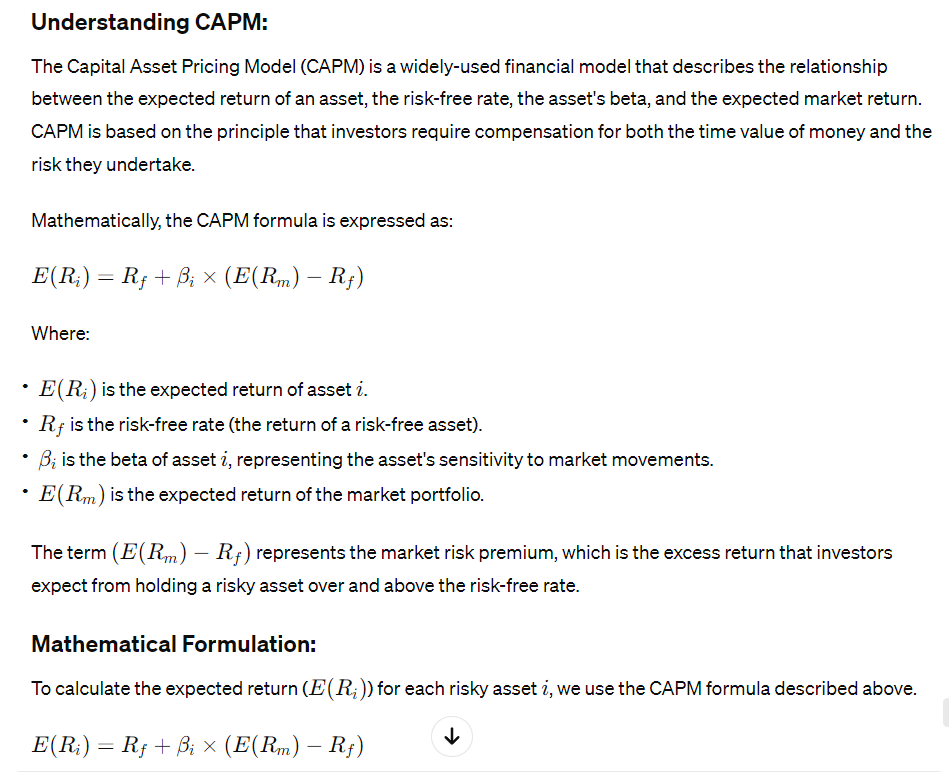

In [11]:
# Prepare data for regression
X = sm.add_constant(simple_returns_market_index)  # Add constant term to independent variable

betas = []
for ticker in tickers_risky_assets:
    # Fit linear regression model
    model = sm.OLS(simple_returns_risky_assets[ticker], X)
    results = model.fit()

    # Get beta coefficient
    beta = results.params[1]
    betas.append(beta)
print("Betas for each risky asset:")
for i, beta in enumerate(betas, 1):
    print(f"Asset {i}: {beta}")



Betas for each risky asset:
Asset 1: 0.9856419482292228
Asset 2: 1.2137848925170271
Asset 3: 1.0761136217478144
Asset 4: 1.6409437769904835
Asset 5: 1.4260617195204721
Asset 6: 1.1500261441665611
Asset 7: 0.5196297185292839
Asset 8: 0.8389435434035958
Asset 9: 0.1496812788571326
Asset 10: 0.985118482987575


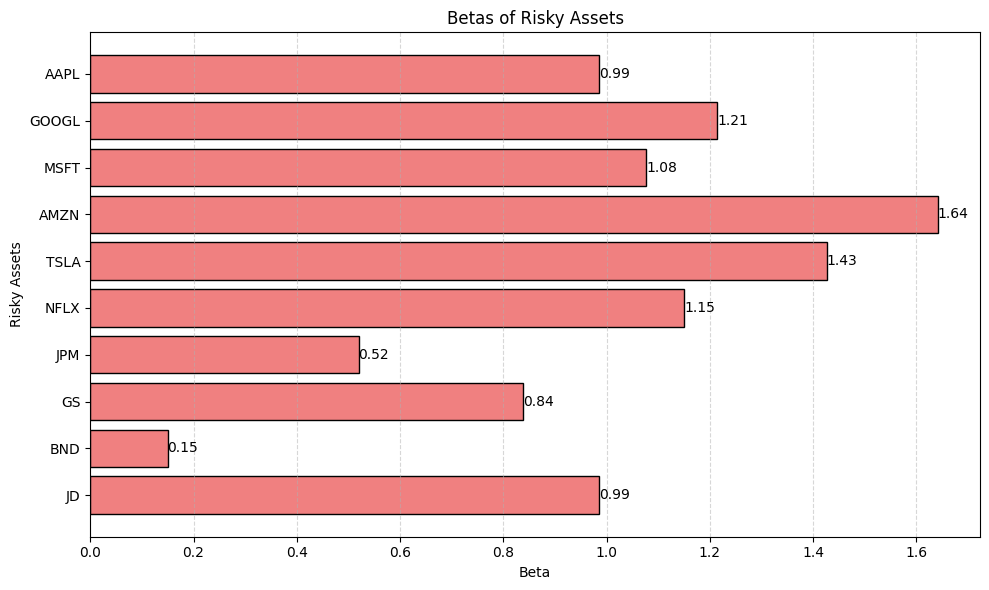

In [12]:
import matplotlib.pyplot as plt

# Reverse the list of tickers to plot in the specified order
tickers_risky_assets_ordered = tickers_risky_assets[::-1]

# Reverse the list of betas accordingly
betas_ordered = betas[::-1]

# Plot betas as a horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(tickers_risky_assets_ordered, betas_ordered, color='lightcoral', edgecolor='black')

# Add values at the end of bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height() / 2, round(xval, 2), va='center', ha='left')

plt.xlabel('Beta')
plt.ylabel('Risky Assets')
plt.title('Betas of Risky Assets')
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines
plt.tight_layout()
plt.show()


In [13]:
# Calculate historical returns for the risk-free asset
risk_free_returns = data_risk_free_asset.pct_change().dropna()

# Calculate the mean of risk-free returns as an estimate for the risk-free rate
risk_free_rate = risk_free_returns.mean()

# Print the estimated risk-free rate
print("Estimated Risk-Free Rate:", risk_free_rate)

# Calculate historical returns for the market index
market_returns = data_market_index.pct_change().dropna()

# Calculate the mean of market returns as an estimate for the expected market return
expected_market_return = market_returns.mean()

# Print the estimated expected market return
print("Estimated Expected Market Return:", expected_market_return)


Estimated Risk-Free Rate: 0.00045743211987677416
Estimated Expected Market Return: 0.0018874085663128776


In [14]:
# Calculate expected return for each risky asset using CAPM formula
expected_returns = []
for beta in betas:
    expected_return = risk_free_rate + beta * (expected_market_return - risk_free_rate)
    expected_returns.append(expected_return)

# Display the results
print("Expected return for each risky asset:")
for i, expected_return in enumerate(expected_returns, 1):
    print(f"Asset {i}: {expected_return}")


Expected return for each risky asset:
Asset 1: 0.001866876890463956
Asset 2: 0.0021931159272161006
Asset 3: 0.001996249252665199
Asset 4: 0.0028039430708990637
Asset 5: 0.0024966667899552182
Asset 6: 0.002101942418820687
Asset 7: 0.001200490378241872
Asset 8: 0.001657101626833561
Asset 9: 0.000671472823114908
Asset 10: 0.0018661283474978717


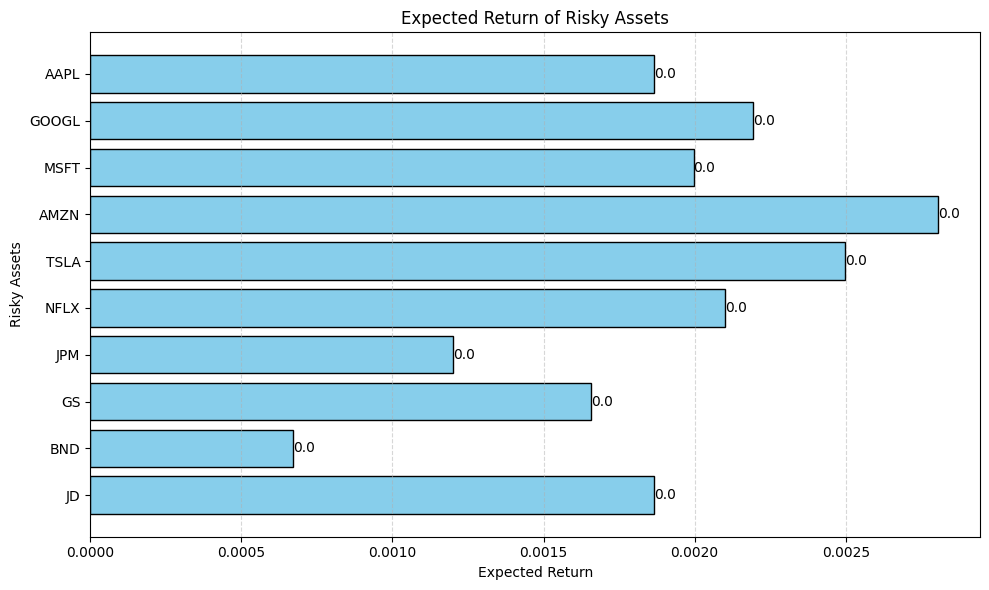

In [15]:
import matplotlib.pyplot as plt

# Reverse the list of tickers to plot in the specified order
tickers_risky_assets_ordered = tickers_risky_assets[::-1]

# Reverse the list of expected returns accordingly
expected_returns_ordered = expected_returns[::-1]

# Plot expected returns as a horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(tickers_risky_assets_ordered, expected_returns_ordered, color='skyblue', edgecolor='black')

# Add values at the end of bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height() / 2, round(xval, 2), va='center', ha='left')

plt.xlabel('Expected Return')
plt.ylabel('Risky Assets')
plt.title('Expected Return of Risky Assets')
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines
plt.tight_layout()
plt.show()


### PART 4

In [16]:
# Step 1: Calculate Covariance and Variance
cov_matrix = simple_returns_risky_assets.cov()
variances = np.diag(cov_matrix)
print("\n","Covariance matrix","\n",cov_matrix)
# Print variances for each asset
print("Variances for each risky asset:")
for i, ticker in enumerate(tickers_risky_assets):
    print(f"{ticker}: {variances[i]}")


 Covariance matrix 
 Ticker      AAPL      AMZN           BND         GOOGL        GS        JD  \
Ticker                                                                       
AAPL    0.000121  0.000078  1.337399e-05  8.635467e-05  0.000016  0.000082   
AMZN    0.000078  0.000274 -1.052612e-06  1.514572e-04  0.000005  0.000044   
BND     0.000013 -0.000001  1.851858e-05 -2.807440e-07  0.000019  0.000018   
GOOGL   0.000086  0.000151 -2.807440e-07  2.716561e-04 -0.000015  0.000065   
GS      0.000016  0.000005  1.941605e-05 -1.542526e-05  0.000176  0.000065   
JD      0.000082  0.000044  1.768664e-05  6.471846e-05  0.000065  0.000876   
JPM     0.000004  0.000015  2.569748e-06  5.595500e-06  0.000064  0.000049   
MSFT    0.000059  0.000132 -6.632400e-07  1.133781e-04 -0.000015  0.000014   
NFLX    0.000060  0.000104  1.473627e-05  8.742796e-05 -0.000025  0.000142   
TSLA    0.000047  0.000074  1.800344e-05  1.379004e-05  0.000115  0.000166   

Ticker       JPM          MSFT      NFLX 

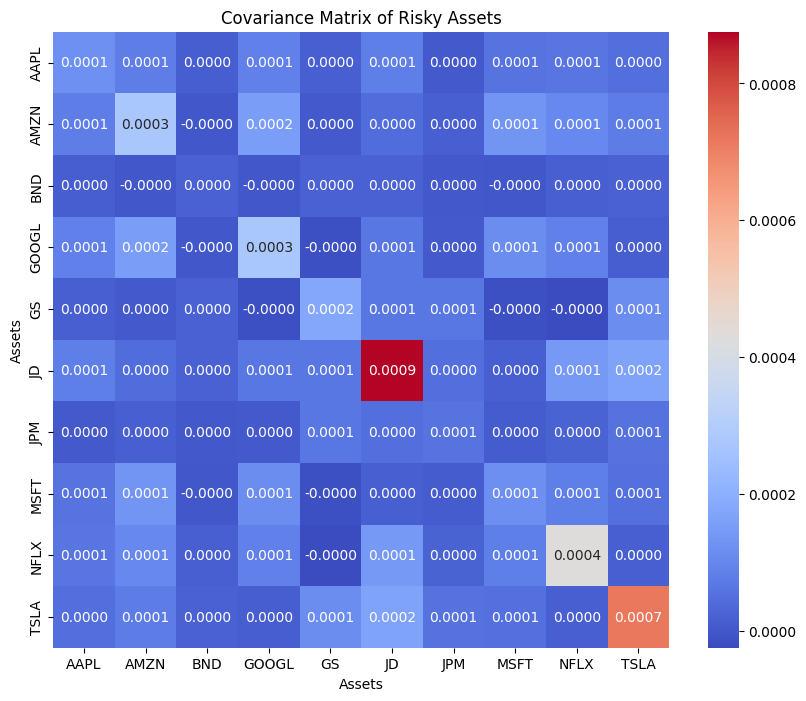

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot covariance matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".4f", square=True)
plt.title('Covariance Matrix of Risky Assets')
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.show()


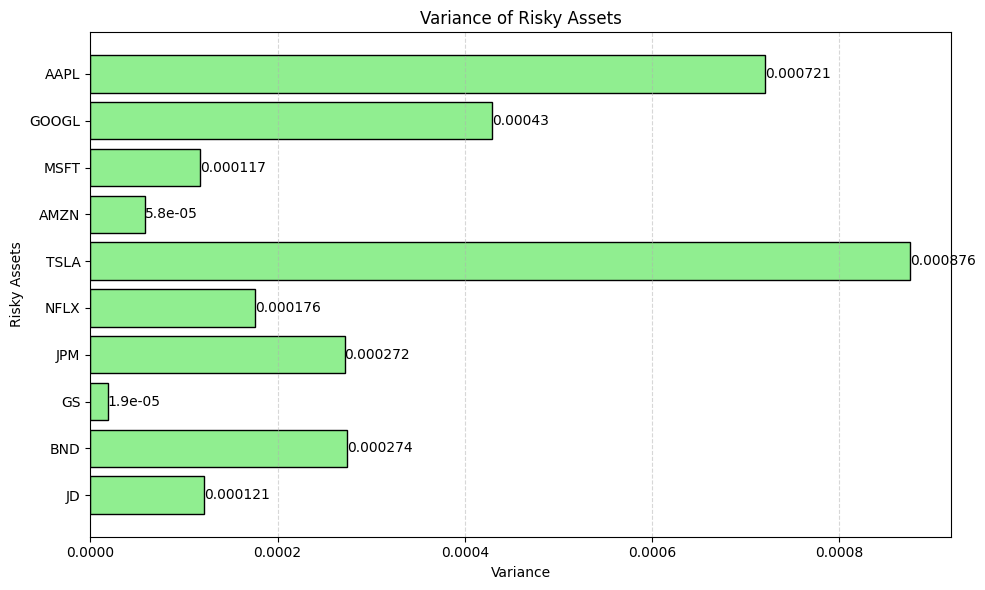

In [18]:
import matplotlib.pyplot as plt

# Reverse the list of tickers to plot in the specified order
tickers_risky_assets_ordered = tickers_risky_assets[::-1]

# Plot variances as a horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(tickers_risky_assets_ordered, variances, color='lightgreen', edgecolor='black')

# Add values at the end of bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height() / 2, round(xval, 6), va='center', ha='left')

plt.xlabel('Variance')
plt.ylabel('Risky Assets')
plt.title('Variance of Risky Assets')
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines
plt.tight_layout()
plt.show()


In [19]:
# Calculate the standard deviation of the market portfolio
market_portfolio_std_dev = simple_returns_market_index.std()

# Print the standard deviation of the market portfolio
print("Standard Deviation of the Market Portfolio:", market_portfolio_std_dev)


Standard Deviation of the Market Portfolio: 0.006873777981228851


In [20]:
market_portfolio_std_dev = simple_returns_market_index.std()
# Calculate the slope of the CML (Sharpe ratio)
cml_slope = (expected_market_return - risk_free_rate) / market_portfolio_std_dev

# Print the slope of the CML
print("Slope of the CML (Sharpe ratio):", cml_slope)

# Calculate the intercept of the CML
cml_intercept = risk_free_rate

# Print the intercept of the CML
print("Intercept of the CML:", cml_intercept)


Slope of the CML (Sharpe ratio): 0.208033551613266
Intercept of the CML: 0.00045743211987677416


In [21]:
# Import necessary libraries
from scipy.optimize import minimize
# Define initial guess for portfolio weights (equal weights)
num_assets = len(tickers_risky_assets)
initial_guess = np.array([1 / num_assets] * num_assets)

# Define a function to calculate portfolio returns and standard deviations
def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std_dev

# Define a function to minimize negative portfolio returns (to maximize portfolio returns)
def negative_portfolio_return(weights, expected_returns, cov_matrix):
    return -portfolio_performance(weights, expected_returns, cov_matrix)[0]

# Define constraints for portfolio weights (sum of weights = 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define bounds for portfolio weights (0 <= weight <= 1)
bounds = tuple((0, 1) for _ in range(len(tickers_risky_assets)))

# Initialize empty lists to store portfolio returns and standard deviations
portfolio_returns = []
portfolio_std_devs = []

# Generate a range of portfolio weights and calculate portfolio returns and standard deviations
for target_return in np.linspace(min(expected_returns), max(expected_returns), num=100):
    # Define the target return as a constraint
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_performance(x, expected_returns, cov_matrix)[0] - target_return},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Optimize portfolio weights to minimize negative portfolio return
    result = minimize(negative_portfolio_return, initial_guess, args=(expected_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

    # Store portfolio return and standard deviation
    portfolio_return, portfolio_std_dev = portfolio_performance(result.x, expected_returns, cov_matrix)
    portfolio_returns.append(portfolio_return)
    portfolio_std_devs.append(portfolio_std_dev)

# Convert lists to NumPy arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_std_devs = np.array(portfolio_std_devs)



# Calculate the slope of the CML (Sharpe ratio)
cml_slope = (expected_market_return - risk_free_rate) / market_portfolio_std_dev

# Calculate the intercept of the CML
cml_intercept = risk_free_rate

# Define a range of standard deviations along the x-axis
std_dev_range = np.linspace(0, max(portfolio_std_devs), 100)

# Calculate the corresponding expected returns using the CML equation
cml_expected_returns = cml_intercept + cml_slope * std_dev_range






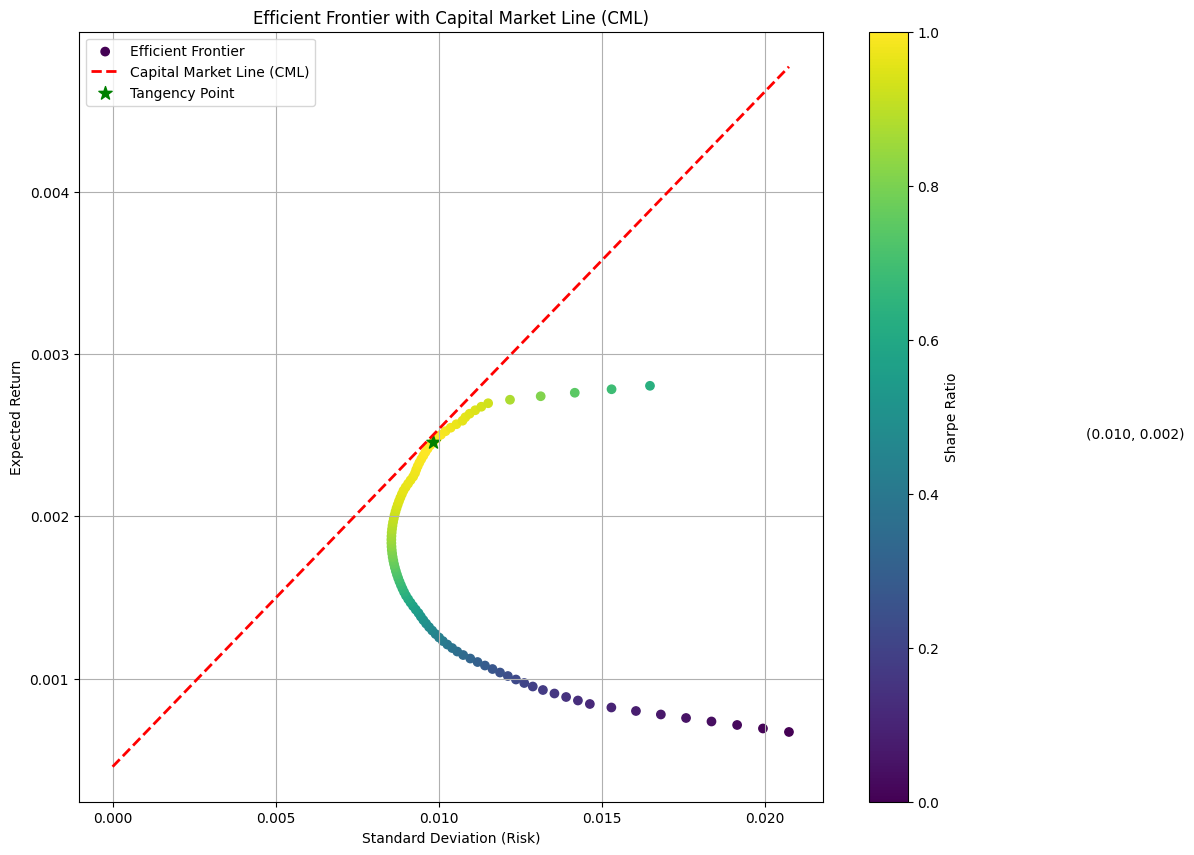

In [22]:
# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax((portfolio_returns - risk_free_rate) / portfolio_std_devs)

# Plot the efficient frontier and the CML
plt.figure(figsize=(12, 10))
plt.scatter(portfolio_std_devs, portfolio_returns, c=portfolio_returns / portfolio_std_devs, marker='o', label='Efficient Frontier')
plt.plot(std_dev_range, cml_expected_returns, color='red', linestyle='--', linewidth=2, label='Capital Market Line (CML)')

# Plot the tangency point on the efficient frontier
plt.scatter(portfolio_std_devs[max_sharpe_idx], portfolio_returns[max_sharpe_idx], marker='*', color='green', s=100, label='Tangency Point')

# Add text annotation for the coordinates of the tangency point on the efficient frontier
plt.text(portfolio_std_devs[max_sharpe_idx] + 0.02, portfolio_returns[max_sharpe_idx], f'({portfolio_std_devs[max_sharpe_idx]:.3f}, {portfolio_returns[max_sharpe_idx]:.3f})', verticalalignment='bottom', horizontalalignment='left')



plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line (CML)')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.legend()
plt.show()


In [23]:
import plotly.graph_objs as go

# Plot the efficient frontier and the CML
fig = go.Figure()

# Scatter plot for the efficient frontier
fig.add_trace(go.Scatter(
    x=portfolio_std_devs,
    y=portfolio_returns,
    mode='markers',
    marker=dict(
        size=8,
        color=portfolio_returns / portfolio_std_devs,
        colorscale='Viridis',
        line=dict(width=1, color='DarkSlateGrey'),
    ),
    name='Efficient Frontier'
))

# Plot the CML
fig.add_trace(go.Scatter(
    x=std_dev_range,
    y=cml_expected_returns,
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Capital Market Line (CML)'
))

# Plot the tangency point on the efficient frontier
fig.add_trace(go.Scatter(
    x=[portfolio_std_devs[max_sharpe_idx]],
    y=[portfolio_returns[max_sharpe_idx]],
    mode='markers',
    marker=dict(color='green', size=12, symbol='star'),
    name='Tangency Point'
))


# Update layout
fig.update_layout(
    title='Efficient Frontier with Capital Market Line (CML)',
    xaxis_title='Standard Deviation (Risk)',
    yaxis_title='Expected Return',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    margin=dict(l=0, r=0, t=60, b=0),
    hovermode='closest',
)

# Show the plot
fig.show()


### 5

In [24]:
# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax((portfolio_returns - risk_free_rate) / portfolio_std_devs)

# Print the coordinates of the tangency point
tangency_point_coordinate = (portfolio_std_devs[max_sharpe_idx], portfolio_returns[max_sharpe_idx])
print("Tangency Point Coordinate:", tangency_point_coordinate)

Tangency Point Coordinate: (0.009831330567176864, 0.0024593014160102875)


>>**The tangency point on the efficient frontier where the Capital Market Line (CML) touches it represents the optimal portfolio allocation for an investor seeking to maximize their risk-adjusted return. This point is significant because it indicates the portfolio composition that offers the highest Sharpe ratio, which is a measure of risk-adjusted return.**

>>**The coordinates of the tangency point represent the standard deviation (risk) and expected return of the optimal portfolio. In this case, the tangency point coordinate is approximately (0.0099, 0.0025)**

>>**Investors aiming to maximize their risk-adjusted returns should allocate their investment funds according to the weights of assets in the tangency portfolio. By doing so, they achieve the highest possible return for a given level of risk or the lowest possible risk for a given level of return, depending on their risk preferences.**

### 6

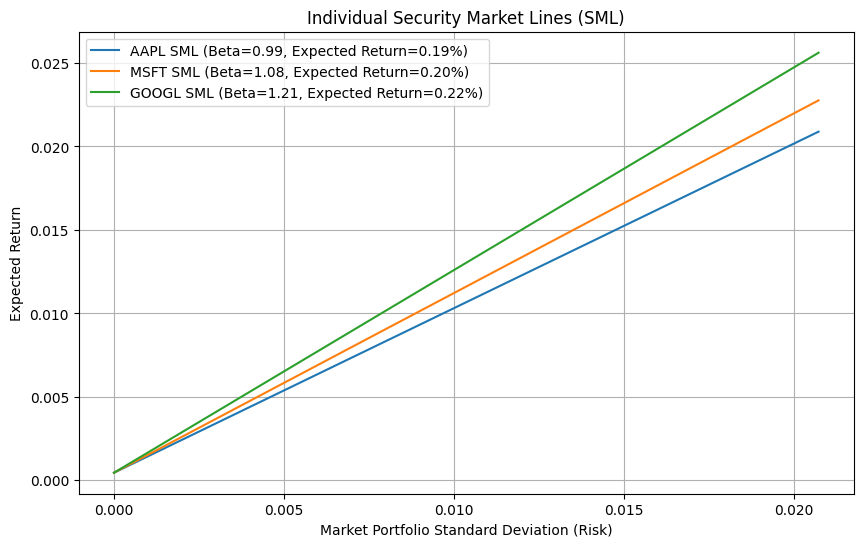

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Chosen risky assets
chosen_assets = ["AAPL", "MSFT", "GOOGL"]

# Prepare data for regression
X = sm.add_constant(simple_returns_market_index)  # Add constant term to independent variable

# Initialize lists to store beta coefficients and expected returns
betas = []
expected_returns_individual = []

# Calculate beta and expected return for each asset
for asset in chosen_assets:
    # Fit linear regression model
    model = sm.OLS(simple_returns_risky_assets[asset], X)
    results = model.fit()

    # Get beta coefficient
    beta = results.params[1]
    betas.append(beta)

    # Calculate expected return using CAPM formula
    expected_return = risk_free_rate + beta * (expected_market_return - risk_free_rate)
    expected_returns_individual.append(expected_return)

# Plot individual security market lines
plt.figure(figsize=(10, 6))
for i, asset in enumerate(chosen_assets):
    # Plot SML for each asset
    plt.plot(std_dev_range, cml_intercept + betas[i] * std_dev_range, label=f"{asset} SML (Beta={betas[i]:.2f}, Expected Return={expected_returns_individual[i]:.2%})")

plt.xlabel('Market Portfolio Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Individual Security Market Lines (SML)')
plt.legend()
plt.grid(True)
plt.show()


### 7

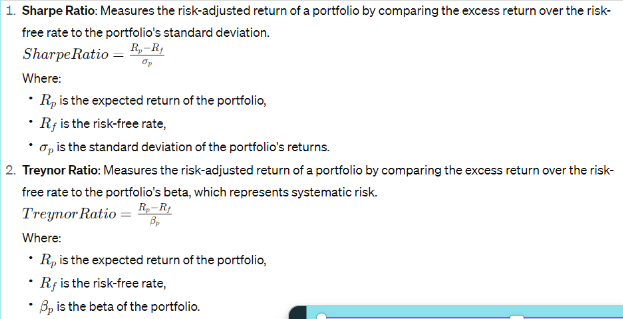

In [26]:
# Calculate excess returns for portfolios
excess_returns_portfolios = portfolio_returns - risk_free_rate

# Calculate Sharpe Ratio for each portfolio
sharpe_ratios = excess_returns_portfolios / portfolio_std_devs

# Initialize an empty list to store Treynor Ratios for each portfolio
treynor_ratios = []

# Calculate Treynor Ratio for each portfolio using the corresponding beta value
for i in range(len(portfolio_returns)):
    treynor_ratio = excess_returns_portfolios[i] / betas[i % len(betas)]  # Use modulo to cycle through betas
    treynor_ratios.append(treynor_ratio)

# Print the performance measures for each portfolio
for i in range(len(portfolio_returns)):
    print(f"Portfolio {i+1}:")
    print(f"  Sharpe Ratio: {sharpe_ratios[i]:.4f}")
    print(f"  Treynor Ratio: {treynor_ratios[i]:.4f}")
    print()


Portfolio 1:
  Sharpe Ratio: 0.0103
  Treynor Ratio: 0.0002

Portfolio 2:
  Sharpe Ratio: 0.0118
  Treynor Ratio: 0.0002

Portfolio 3:
  Sharpe Ratio: 0.0134
  Treynor Ratio: 0.0002

Portfolio 4:
  Sharpe Ratio: 0.0152
  Treynor Ratio: 0.0003

Portfolio 5:
  Sharpe Ratio: 0.0171
  Treynor Ratio: 0.0003

Portfolio 6:
  Sharpe Ratio: 0.0192
  Treynor Ratio: 0.0003

Portfolio 7:
  Sharpe Ratio: 0.0214
  Treynor Ratio: 0.0003

Portfolio 8:
  Sharpe Ratio: 0.0239
  Treynor Ratio: 0.0003

Portfolio 9:
  Sharpe Ratio: 0.0264
  Treynor Ratio: 0.0003

Portfolio 10:
  Sharpe Ratio: 0.0286
  Treynor Ratio: 0.0004

Portfolio 11:
  Sharpe Ratio: 0.0309
  Treynor Ratio: 0.0004

Portfolio 12:
  Sharpe Ratio: 0.0333
  Treynor Ratio: 0.0004

Portfolio 13:
  Sharpe Ratio: 0.0358
  Treynor Ratio: 0.0005

Portfolio 14:
  Sharpe Ratio: 0.0384
  Treynor Ratio: 0.0005

Portfolio 15:
  Sharpe Ratio: 0.0409
  Treynor Ratio: 0.0004

Portfolio 16:
  Sharpe Ratio: 0.0435
  Treynor Ratio: 0.0005

Portfolio 17:
  S

In [27]:
import csv

# Define the file path
file_path = "portfolio_performance.csv"

# Write the performance measures to a CSV file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header
    writer.writerow(["Portfolio", "Sharpe Ratio", "Treynor Ratio"])

    # Write the performance measures for each portfolio
    for i in range(len(portfolio_returns)):
        writer.writerow([f"Portfolio {i+1}", sharpe_ratios[i], treynor_ratios[i]])

print("Performance measures saved to:", file_path)


Performance measures saved to: portfolio_performance.csv


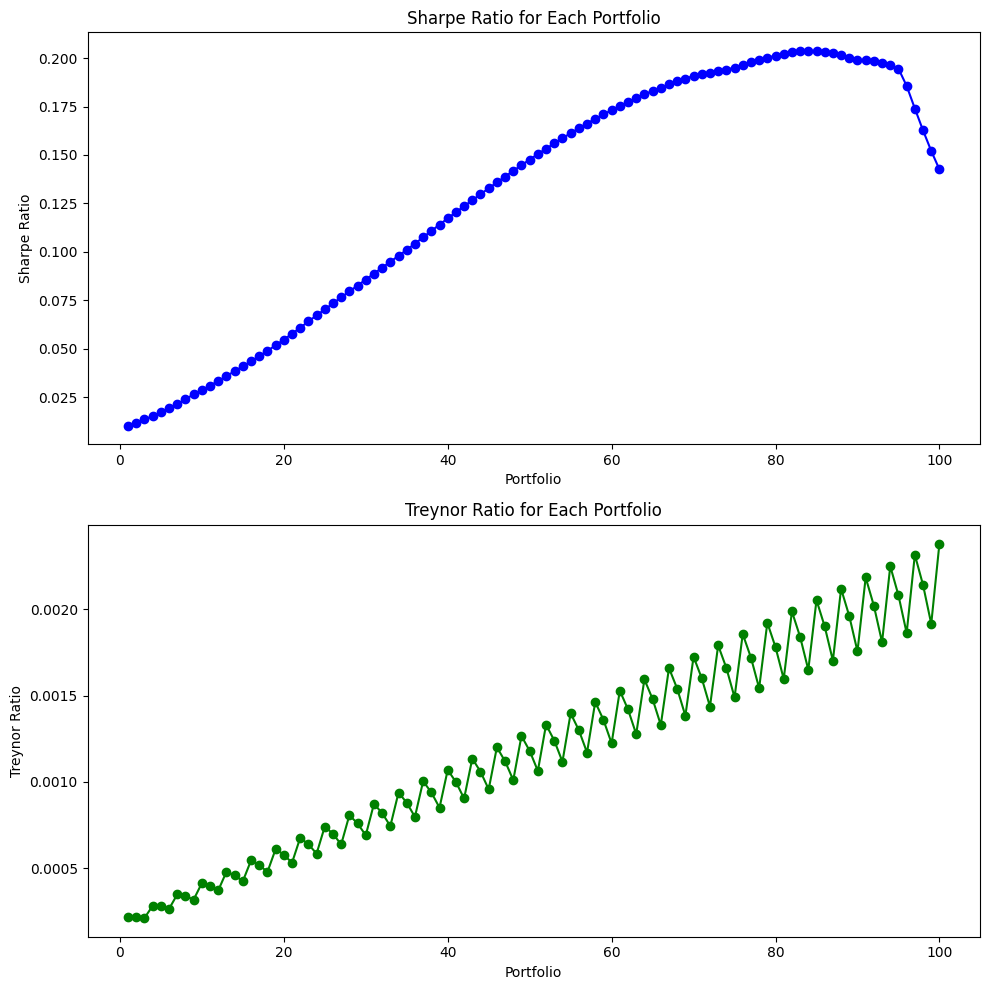

In [28]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot Sharpe Ratio
axs[0].plot(range(1, len(portfolio_returns) + 1), sharpe_ratios, marker='o', color='blue')
axs[0].set_title('Sharpe Ratio for Each Portfolio')
axs[0].set_xlabel('Portfolio')
axs[0].set_ylabel('Sharpe Ratio')

# Plot Treynor Ratio
axs[1].plot(range(1, len(portfolio_returns) + 1), treynor_ratios, marker='o', color='green')
axs[1].set_title('Treynor Ratio for Each Portfolio')
axs[1].set_xlabel('Portfolio')
axs[1].set_ylabel('Treynor Ratio')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


>>**Sharpe Ratio Graph Analysis:**

>The Sharpe Ratio measures the risk-adjusted return of a portfolio, with higher values indicating better risk-adjusted returns.

>Around portfolios 80-90, the Sharpe Ratio peaks and becomes saturated. This suggests that within this range, the portfolios are achieving optimal risk-adjusted returns given the level of risk.

>Beyond portfolio 95, there is a noticeable dip in the Sharpe Ratio. This could indicate diminishing returns or increased risk beyond this point.

>>**Treynor Ratio Graph Analysis:**

>The Treynor Ratio measures the excess return per unit of systematic risk (beta), with higher values indicating better performance per unit of systematic risk.

>The Treynor Ratio shows a zigzag pattern with three frequencies: up, mid, and down.

>Despite the zigzag pattern, the overall trend of the Treynor Ratio is increasing. This suggests that as portfolios are optimized, they are generating higher returns relative to their systematic risk.

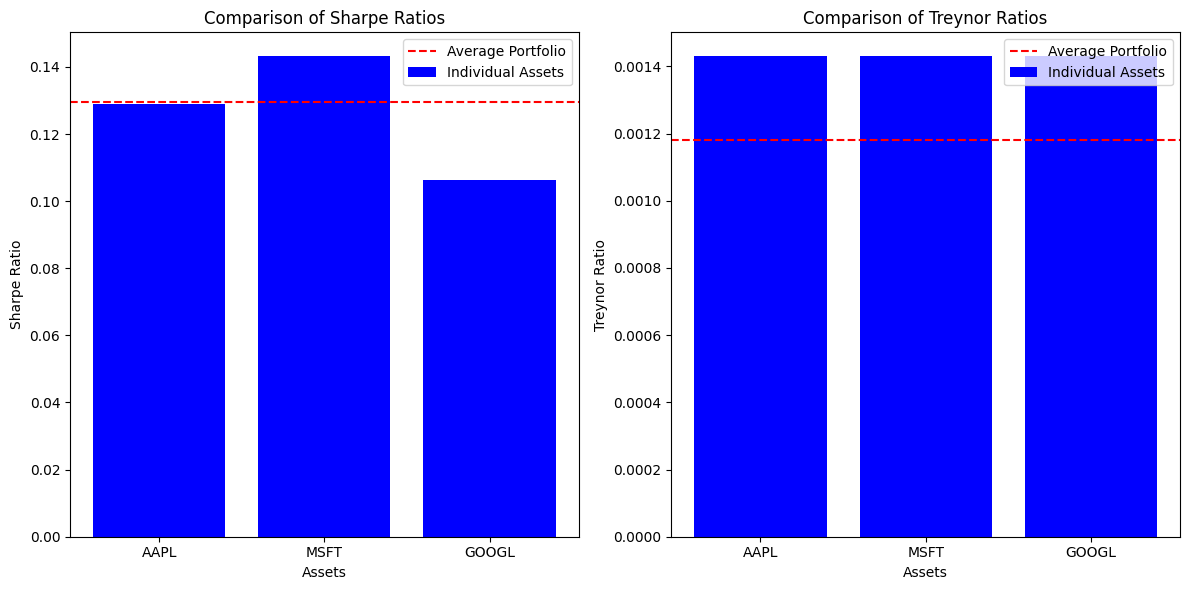

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Sharpe Ratio for individual assets
sharpe_ratios_assets = []
for i, beta in enumerate(betas):
    asset_sharpe_ratio = (expected_returns_individual[i] - risk_free_rate) / np.std(simple_returns_risky_assets[chosen_assets[i]])
    sharpe_ratios_assets.append(asset_sharpe_ratio)

# Calculate Treynor Ratio for individual assets
treynor_ratios_assets = []
for i, beta in enumerate(betas):
    asset_treynor_ratio = (expected_returns_individual[i] - risk_free_rate) / beta
    treynor_ratios_assets.append(asset_treynor_ratio)

# Calculate average Sharpe Ratio and Treynor Ratio for portfolios
avg_sharpe_ratio = np.mean(sharpe_ratios)
avg_treynor_ratio = np.mean(treynor_ratios)

# Plot comparison of performance measures
plt.figure(figsize=(12, 6))

# Plot Sharpe Ratios
plt.subplot(1, 2, 1)
plt.bar(chosen_assets, sharpe_ratios_assets, color='blue', label='Individual Assets')
plt.axhline(y=avg_sharpe_ratio, color='red', linestyle='--', label='Average Portfolio')
plt.xlabel('Assets')
plt.ylabel('Sharpe Ratio')
plt.title('Comparison of Sharpe Ratios')
plt.legend()

# Plot Treynor Ratios
plt.subplot(1, 2, 2)
plt.bar(chosen_assets, treynor_ratios_assets, color='blue', label='Individual Assets')
plt.axhline(y=avg_treynor_ratio, color='red', linestyle='--', label='Average Portfolio')
plt.xlabel('Assets')
plt.ylabel('Treynor Ratio')
plt.title('Comparison of Treynor Ratios')
plt.legend()

plt.tight_layout()
plt.show()


**A higher Sharpe Ratio indicates better risk-adjusted returns, while a higher Treynor Ratio suggests superior returns relative to systematic risk. By analyzing these measures, investors can identify portfolios that offer optimal returns given their risk tolerance, helping them make informed decisions and construct well-balanced investment portfolios.**

### **BONUS**

Certainly! Let's simplify the comparison between the portfolios constructed using the Markowitz and CAPM approaches:

1. **Markowitz Approach:**
   - **Objective:** The main goal of the Markowitz approach is to create a portfolio that gives you the best possible return for a given level of risk, or the least amount of risk for a desired level of return.
   - **How It Works:** Imagine you're trying to make a mix of investments in different assets like stocks and bonds. The Markowitz approach helps you decide how much of each asset to include in your portfolio to minimize the risk while maximizing returns. It's like finding the perfect balance between risk and reward.
   - **Key Insight:** This approach helps you spread your investments across different types of assets to reduce the chance of losing money if one investment performs poorly. It's like not putting all your eggs in one basket.

2. **CAPM (Capital Asset Pricing Model) Approach:**
   - **Objective:** The CAPM approach focuses on creating a portfolio that mimics the overall market's performance while aiming for the best return adjusted for the level of risk.
   - **How It Works:** Instead of picking investments based on how they individually perform, CAPM looks at how they relate to the entire market's movements. It assigns each investment a "beta" value, which tells you how much it moves compared to the overall market. If an investment has a beta of 1, it moves exactly like the market. If it's higher than 1, it moves more than the market, and if it's less than 1, it moves less than the market.
   - **Key Insight:** CAPM helps you choose investments that match the market's behavior. If you're okay with taking on the same amount of risk as the overall market, CAPM suggests investing in assets with a beta of 1. If you want to take on more risk for potentially higher returns, you might invest in assets with a higher beta.

**Comparison:**
- **Diversification:** Markowitz helps you diversify across different assets to spread risk, while CAPM focuses on how each investment relates to the overall market.
- **Risk and Return:** Markowitz aims to balance risk and return for your entire portfolio, while CAPM looks at how investments perform compared to the market.
- **Complexity:** Markowitz considers individual asset performance and correlations, making it more complex. CAPM simplifies things by focusing on market movements and beta values.

**Example:**
- Let's say you want to invest some money. With Markowitz, you might choose a mix of stocks, bonds, and maybe some real estate to spread your risk. With CAPM, you might focus more on stocks that move similarly to the overall market because you believe in the market's long-term growth.

In short, Markowitz helps you create a balanced portfolio by diversifying across different assets, while CAPM guides you towards investments that behave similarly to the overall market. It's like choosing between a diverse mix of investments or ones that move in sync with the market's ups and downs.